In [1]:
import sys
import json
import dill

import torch

# Monkey patch the method to enforce loading on CPU since we trained on CUDA
if not torch.cuda.is_available():
    base_load = torch.load
    torch.load = lambda f: base_load(f, map_location='cpu')

sys.path.append('../src')

In [2]:
import numpy as np

vent_bert_lstm_hash = '66c65a184361c8a5b33890783c9ed7a0'

experiment_hash = vent_bert_lstm_hash
is_bert = experiment_hash == vent_bert_lstm_hash

config = json.load(open(f'../output/Vent/replica-fractions-with-test/{experiment_hash}.json'))
thresholds = np.asarray(config['results']['thresholds'][1])
cats, extractor, model = dill.load(open(f'../models/Vent/fractions-with-test/{experiment_hash}.pkl', 'rb'))

In [3]:
import pandas as pd

BATCH_PATH = 'batches/Batch_4386904_batch_results_1.csv_corrected.csv'
CATEGORY_DICTIONARY = {'Adoring': 'Affection', 'Affectionate': 'Affection', 'Caring': 'Affection', 'Cuddly': 'Affection', 'Infatuated': 'Affection', 'Loving': 'Affection', 'Needy': 'Affection', 'Passionate': 'Affection', 'Supportive': 'Affection', 'Angry': 'Anger', 'Annoyed': 'Anger', 'Bitter': 'Anger', 'Disgusted': 'Anger', 'Done': 'Anger', 'Frustrated': 'Anger', 'Furious': 'Anger', 'Irritated': 'Anger', 'Jealous': 'Anger', 'Adventurous': 'Creativity', 'Artistic': 'Creativity', 'Creative': 'Creativity', 'Dreamy': 'Creativity', 'Imaginative': 'Creativity', 'Inspired': 'Creativity', 'Musical': 'Creativity', 'Poetic': 'Creativity', 'Spacey': 'Creativity', 'Thoughtful': 'Creativity', 'Afraid': 'Fear', 'Anxious': 'Fear', 'Awkward': 'Fear', 'Impatient': 'Fear', 'Insecure': 'Fear', 'Nervous': 'Fear', 'Overwhelmed': 'Fear', 'Shy': 'Fear', 'Stressed': 'Fear', 'Uncomfortable': 'Fear', 'Worried': 'Fear', 'Bored': 'Feelings', 'Guilty': 'Feelings', 'Hungry': 'Feelings', 'Hurt': 'Feelings', 'Lazy': 'Feelings', 'Meh': 'Feelings', 'Nostalgic': 'Feelings', 'Sick': 'Feelings', 'Sleepy': 'Feelings', 'Tired': 'Feelings', 'Upset': 'Feelings', 'Amused': 'Happiness', 'Calm': 'Happiness', 'Chill': 'Happiness', 'Content': 'Happiness', 'Excited': 'Happiness', 'Happy': 'Happiness', 'Proud': 'Happiness', 'Relaxed': 'Happiness', 'Relieved': 'Happiness', 'Confident': 'Positivity', 'Determined': 'Positivity', 'Hopeful': 'Positivity', 'Hyped': 'Positivity', 'Motivated': 'Positivity', 'Optimistic': 'Positivity', 'Safe': 'Positivity', 'Strong': 'Positivity', 'Thankful': 'Positivity', 'Ashamed': 'Sadness', 'Disappointed': 'Sadness', 'Empty': 'Sadness', 'Exhausted': 'Sadness', 'Heartbroken': 'Sadness', 'Lonely': 'Sadness', 'Lost': 'Sadness', 'Miserable': 'Sadness', 'Numb': 'Sadness', 'Sad': 'Sadness', 'Sorry': 'Sadness', 'Amazed': 'Surprise', 'Astonished': 'Surprise', 'Conflicted': 'Surprise', 'Confused': 'Surprise', 'Curious': 'Surprise', 'Embarrassed': 'Surprise', 'Interested': 'Surprise', 'Shocked': 'Surprise', 'Surprised': 'Surprise'}

dataset = pd.read_csv(BATCH_PATH)

In [4]:
dataset

,Unnamed: 0,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,...,WorkTimeInSeconds,LifetimeApprovalRate,Last30DaysApprovalRate,Last7DaysApprovalRate,Input.INSTANCE_DATA,Answer.currentAnnotation,Answer.permutation,Approve,Reject,ApprovalFraction
0,0,3IKMEYR0LWCL6YH691NR6XTPLAQK27,3M55KGTKUZ6FAU1RJZG4F95E03P4P0,Internal emotion detection inferred from socia...,What emotion did the person writing this text ...,"emotion detection, text",$0.32,Mon Mar 29 12:30:43 PDT 2021,5,BatchId:4386904;OriginalHitTemplateId:928390866;,...,187,100% (146/146),100% (146/146),100% (146/146),"[{""emotion"": ""Uncomfortable"", ""text"": ""not rea...","Lazy,Jealous,Overwhelmed,Motivated,Frustrated,...","1,2,3,9,0,6,7,4,5,8",x,NaN,0.993289
1,1,36FFXPMST958BF53QEIR0IG0UYIHO6,3M55KGTKUZ6FAU1RJZG4F95E03P4P0,Internal emotion detection inferred from socia...,What emotion did the person writing this text ...,"emotion detection, text",$0.32,Mon Mar 29 12:30:43 PDT 2021,5,BatchId:4386904;OriginalHitTemplateId:928390866;,...,180,100% (146/146),100% (146/146),100% (146/146),"[{""emotion"": ""Lazy"", ""text"": ""i really need to...","Lazy,Optimistic,Uncomfortable,Optimistic,Inspi...","9,6,3,2,7,5,1,4,8,0",x,NaN,0.993289
2,2,32CAVSKPCE6SK94MKBRF71SIVVAU1X,3M55KGTKUZ6FAU1RJZG4F95E03P4P0,Internal emotion detection inferred from socia...,What emotion did the person writing this text ...,"emotion detection, text",$0.32,Mon Mar 29 12:30:34 PDT 2021,5,BatchId:4386904;OriginalHitTemplateId:928390866;,...,251,100% (146/146),100% (146/146),100% (146/146),"[{""emotion"": ""Empty"", ""text"": ""I can\u2019t se...","Frustrated,Relieved,Disgusted,Cuddly,Tired,Sic...","5,6,8,9,1,7,2,4,0,3",x,NaN,0.993289
3,3,3YLPJ8OXX8U1TCV0CYL4P6YP1X1X45,3M55KGTKUZ6FAU1RJZG4F95E03P4P0,Internal emotion detection inferred from socia...,What emotion did the person writing this text ...,"emotion detection, text",$0.32,Mon Mar 29 12:30:43 PDT 2021,5,BatchId:4386904;OriginalHitTemplateId:928390866;,...,454,100% (146/146),100% (146/146),100% (146/146),"[{""emotion"": ""Meh"", ""text"": ""I'm not worth muc...","Upset,Astonished,Miserable,Optimistic,Confiden...","2,7,0,8,6,5,3,4,1,9",x,NaN,0.993289
4,4,3S8APUMBJX04EPPORJP5RD4O7KMFB2,3M55KGTKUZ6FAU1RJZG4F95E03P4P0,Internal emotion detection inferred from socia...,What emotion did the person writing this text ...,"emotion detection, text",$0.32,Mon Mar 29 12:30:43 PDT 2021,5,BatchId:4386904;OriginalHitTemplateId:928390866;,...,380,100% (146/146),100% (146/146),100% (146/146),"[{""emotion"": ""Embarrassed"", ""text"": ""My socks ...","Imaginative,Hopeful,Inspired,Happy,Miserable,A...","4,8,0,9,3,6,7,2,1,5",x,NaN,0.993289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,1346,37PGLWGSJTNPHJV8Y48JTD06A6NKII,3M55KGTKUZ6FAU1RJZG4F95E03P4P0,Internal emotion detection inferred from socia...,What emotion did the person writing this text ...,"emotion detection, text",$0.32,Mon Mar 29 12:30:53 PDT 2021,5,BatchId:4386904;OriginalHitTemplateId:928390866;,...,238,100% (1/1),100% (1/1),100% (1/1),"[{""emotion"": ""Musical"", ""text"": ""Mood: \ud83c\...","Bitter,Bored,Stressed,Hyped,Sad,Heartbroken,An...","2,9,8,3,6,4,1,7,5,0",x,NaN,1.000000
1347,1347,3CKVGCS3PGMCY7R0ZNSFEVRK56JS0C,3M55KGTKUZ6FAU1RJZG4F95E03P4P0,Internal emotion detection inferred from socia...,What emotion did the person writing this text ...,"emotion detection, text",$0.32,Mon Mar 29 12:30:53 PDT 2021,8,BatchId:4386904;OriginalHitTemplateId:928390866;,...,221,0% (0/1),0% (0/1),0% (0/1),"[{""emotion"": ""Interested"", ""text"": ""Ok SO ,, k...","Lost,Strong,Creative,Happy,Creative,Bored,Lovi...","2,5,0,4,7,9,8,3,1,6",NaN,Your annotation quality is not sufficient. You...,0.000000
1348,1348,3126F2F5F8KEC5Q2FDN04FODCNMPEF,3M55KGTKUZ6FAU1RJZG4F95E03P4P0,Internal emotion detection inferred from socia...,What emotion did the person writing this text ...,"emotion detection, text",$0.32,Mon Mar 29 12:30:53 PDT 2021,5,

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1200)
pd.set_option('display.max_colwidth', 1024)


In [6]:
def predict_categories(text, with_max_pred=True):
    extracted = extractor(text)
    output = model(extracted)
    probas = torch.sigmoid(output)
    thresholded = (probas.detach().numpy() > thresholds)[0]
    paired = [cat for cat, passes in zip(cats, thresholded) if passes]
    if not paired and with_max_pred:
        paired.append(cats[probas.argmax()])
    return sorted(paired)

In [7]:
approved_df = dataset[dataset.Approve == 'x']
responses_df = approved_df.groupby(['HITId', 'Input.INSTANCE_DATA']).agg({'Answer.currentAnnotation': list})
responses_df = responses_df.reset_index()

annotations = []
for i, row in responses_df.iterrows():
    hit = row.HITId
    instance = json.loads(row['Input.INSTANCE_DATA'])
    judgements = [value.split(',') for value in row['Answer.currentAnnotation']]
    for i, value in enumerate(instance):
        text = value['text']
        emotion = value['emotion']
        instance_judgements = [values[i] for values in judgements]
        predicted_judgements = predict_categories(text)
        annotations.append({
            'text': text,
            'emotion': emotion,
            'category': CATEGORY_DICTIONARY[emotion],
            'pred_judgements': predicted_judgements,
            'pred_category_judgements': [CATEGORY_DICTIONARY[emo] for emo in predicted_judgements],
            'judgements': instance_judgements,
            'category_judgements': [CATEGORY_DICTIONARY[emo] for emo in instance_judgements]
        })

annotations_df = pd.DataFrame(annotations)
annotations_df

,text,emotion,category,pred_judgements,pred_category_judgements,judgements,category_judgements
0,"On average, people fall in love seven times before getting married.",Uncomfortable,Fear,[Thoughtful],[Creativity],"[Thoughtful, Passionate, Conflicted, Sleepy, Shocked]","[Creativity, Affection, Surprise, Feelings, Surprise]"
1,Pfp is today's effort. Almost done. Leather seat too😍😍😍 I hate the part where I part with them😔,Creative,Creativity,[Proud],[Happiness],"[Content, Insecure, Creative, Hyped, Disappointed]","[Happiness, Fear, Creativity, Positivity, Sadness]"
2,So happy to go back to Canada tomorrow and to be home so tired of being here,Excited,Happiness,"[Exhausted, Tired]","[Sadness, Feelings]","[Excited, Amused, Content, Proud, Relieved]","[Happiness, Happiness, Happiness, Happiness, Happiness]"
3,The whole point if buying those type of crayons was that they werent so weird,Sad,Sadness,"[Meh, Spacey, Thoughtful]","[Feelings, Creativity, Creativity]","[Confused, Creative, Dreamy, Confused, Embarrassed]","[Surprise, Creativity, Creativity, Surprise, Surprise]"
4,AND THEN AN OLD CONNECT HIT ME UP ABOUT AN ACTING INSTRUCTOR HE HIGHLY RECOMMENDED OMG YES,Happy,Happiness,"[Amazed, Amused, Surprised]","[Surprise, Happiness, Surprise]","[Excited, Artistic, Lazy, Annoyed, Excited]","[Happiness, Creativity, Feelings, Anger, Happiness]"
...,...,...,...,...,...,...,...
2635,Look guys A smiling mustache :3 He likes to smile ^-^,Optimistic,Positivity,[Amused],[Happiness],"[Happy, Amused, Infatuated, Imaginative, Amused]","[Happiness, Happiness, Affection, Creativity, Happiness]"
2636,I think it's starting to hit me that I'm actually physically really going to be moving out THIS FUCKING WEEKEND and im going to be 5 HOURS AWAY FROM HOME,Nervous,Fear,[Tired],[Feelings],"[Upset, Safe, Bitter, Frustrated, Frustrated]","[Feelings, Positivity, Anger, Anger, Anger]"
2637,I need to get ready for school in 10 minutes but I’m fucking crying,Overwhelmed,Fear,"[Miserable, Overwhelmed, Sad, Upset]","[Sadness, Fear, Sadness, Feelings]","[Anxious, Afraid, Overwhelmed, Anxious, Empty]","[Fear, Fear, Fear, Fear, Sadness]"
2638,I love when someone remembers something I told them long time ago.,Proud,Happiness,[Thoughtful],[Creativity],"[Content, Passionate, Affectionate, Loving, Hopeful]","[Happiness, Affection, Affection, Affection, Positivity]"


In [8]:
np.mean([len(set(l)) for l in annotations_df.pred_category_judgements.tolist()])

1.4037878787878788

In [9]:
annotations_df.category.value_counts()

Feelings      330
Fear          330
Sadness       330
Creativity    300
Surprise      270
Happiness     270
Positivity    270
Affection     270
Anger         270
Name: category, dtype: int64

In [10]:
from utils.evaluate import classification_report

def vectorify(value_list, value_mappings, eye_matrix):
    if not value_list:
        return np.zeros(len(value_mappings))
    
    unique_values = set(value_list)
    def remap(x):
        as_index = value_mappings[x]
        return eye_matrix[as_index]
    
    return sum((remap(value) for value in unique_values))

emo_cats = sorted(list(set(CATEGORY_DICTIONARY.values())))

emotion_indices = {emo: i for i, emo in enumerate(cats)}
category_indices = {cat: i for i, cat in enumerate(emo_cats)}

emo_ones = np.eye(len(emotion_indices))
emo_matrix = np.asarray([vectorify([emo], emotion_indices, emo_ones) for emo in annotations_df.emotion.tolist()])
pred_matrix = np.asarray([vectorify(emos, emotion_indices, emo_ones) for emos in annotations_df.pred_judgements.tolist()])
anno_matrix = np.asarray([vectorify(emos, emotion_indices, emo_ones) for emos in annotations_df.judgements.tolist()])

cat_ones = np.eye(len(category_indices))
emo_cat_matrix = np.asarray([vectorify([cat], category_indices, cat_ones) for cat in annotations_df.category.tolist()])
pred_cat_matrix = np.asarray([vectorify(cats, category_indices, cat_ones) for cats in annotations_df.pred_category_judgements.tolist()])
anno_cat_matrix = np.asarray([vectorify(cats, category_indices, cat_ones) for cats in annotations_df.category_judgements.tolist()])

rep_emo = classification_report(emo_matrix, pred_matrix, cats)
print(f'Author by Model Emotion\n• Macro F1: {rep_emo["macro_f1"]:.4f}\n• Micro F1: {rep_emo["micro_f1"]:.4f}\n• Precision: {rep_emo["micro_precision"]:.4f}\n• Recall: {rep_emo["micro_recall"]:.4f}')

rep_anno = classification_report(anno_matrix, pred_matrix, cats)
print(f'Annotator by Model Emotion\n• Macro F1: {rep_anno["macro_f1"]:.4f}\n• Micro F1: {rep_anno["micro_f1"]:.4f}\n• Precision: {rep_anno["micro_precision"]:.4f}\n• Recall: {rep_anno["micro_recall"]:.4f}')

rep_inter = classification_report(emo_matrix, anno_matrix, cats)
print(f'Author by Annotator Emotion\n• Macro F1: {rep_inter["macro_f1"]:.4f}\n• Micro F1: {rep_inter["micro_f1"]:.4f}\n• Precision: {rep_inter["micro_precision"]:.4f}\n• Recall: {rep_inter["micro_recall"]:.4f}')

rep_inv = classification_report(anno_matrix, emo_matrix, cats)
print(f'Annotator by Author Interaction Emotion\n• Macro F1: {rep_inv["macro_f1"]:.4f}\n• Micro F1: {rep_inv["micro_f1"]:.4f}\n• Precision: {rep_inv["micro_precision"]:.4f}\n• Recall: {rep_inv["micro_recall"]:.4f}')

rep_cat_emo = classification_report(emo_cat_matrix, pred_cat_matrix, emo_cats)
print(f'Author by Model Category\n• Macro F1: {rep_cat_emo["macro_f1"]:.4f}\n• Micro F1: {rep_cat_emo["micro_f1"]:.4f}\n• Precision: {rep_cat_emo["micro_precision"]:.4f}\n• Recall: {rep_cat_emo["micro_recall"]:.4f}')

rep_cat_anno = classification_report(anno_cat_matrix, pred_cat_matrix, emo_cats)
print(f'Annotator by Model Category\n• Macro F1: {rep_cat_anno["macro_f1"]:.4f}\n• Micro F1: {rep_cat_anno["micro_f1"]:.4f}\n• Precision: {rep_cat_anno["micro_precision"]:.4f}\n• Recall: {rep_cat_anno["micro_recall"]:.4f}')

rep_cat_inter = classification_report(emo_cat_matrix, anno_cat_matrix, emo_cats)
print(f'Author by Annotator Category\n• Macro F1: {rep_cat_inter["macro_f1"]:.4f}\n• Micro F1: {rep_cat_inter["micro_f1"]:.4f}\n• Precision: {rep_cat_inter["micro_precision"]:.4f}\n• Recall: {rep_cat_inter["micro_recall"]:.4f}')

rep_inv_cat_inter = classification_report(anno_cat_matrix, emo_cat_matrix, emo_cats)
print(f'Annotator by Author Interaction Category\n• Macro F1: {rep_inv_cat_inter["macro_f1"]:.4f}\n• Micro F1: {rep_inv_cat_inter["micro_f1"]:.4f}\n• Precision: {rep_inv_cat_inter["micro_precision"]:.4f}\n• Recall: {rep_inv_cat_inter["micro_recall"]:.4f}')

Author by Model Emotion
• Macro F1: 0.1810
• Micro F1: 0.1810
• Precision: 0.1678
• Recall: 0.2477
Annotator by Model Emotion
• Macro F1: 0.2409
• Micro F1: 0.2460
• Precision: 0.4653
• Recall: 0.1836
Author by Annotator Emotion
• Macro F1: 0.1511
• Micro F1: 0.1511
• Precision: 0.1025
• Recall: 0.3545
Annotator by Author Interaction Emotion
• Macro F1: 0.1511
• Micro F1: 0.1356
• Precision: 0.3941
• Recall: 0.0861
Author by Model Category
• Macro F1: 0.3948
• Micro F1: 0.3951
• Precision: 0.3564
• Recall: 0.4716
Annotator by Model Category
• Macro F1: 0.4668
• Micro F1: 0.4713
• Precision: 0.7302
• Recall: 0.3572
Author by Annotator Category
• Macro F1: 0.3828
• Micro F1: 0.3831
• Precision: 0.2612
• Recall: 0.7250
Annotator by Author Interaction Category
• Macro F1: 0.3828
• Micro F1: 0.3815
• Precision: 0.7281
• Recall: 0.2592


In [11]:
def print_report(report):
    for label, stats in report['labels'].items():
        p = stats['precision']
        r = stats['recall']
        f = stats['f1']
        s = stats['support']
        print('{}\tPrecision: {}\tRecall: {}\tF1-score: {}\tSupport: {}'.format(label, p, r, f, s))
    print('')
    print('Mean macro F1-score: {:.4f}'.format(report['macro_f1']))
    print('Mean micro F1-score: {:.4f}'.format(report['micro_f1']))
    print('Mean micro Precision: {:.4f}'.format(report['micro_precision']))
    print('Mean micro Recall: {:.4f}'.format(report['micro_recall']))

print('Model: ')
print_report(rep_cat_emo)
print()

print('MTurks:')
print_report(rep_cat_inter)

Model: 
Affection	Precision: 0.46808510638297873	Recall: 0.4074074074074074	F1-score: 0.43564356435643564	Support: 270.0
Anger	Precision: 0.43506493506493504	Recall: 0.4962962962962963	F1-score: 0.4636678200692041	Support: 270.0
Creativity	Precision: 0.2564102564102564	Recall: 0.5	F1-score: 0.3389830508474576	Support: 300.0
Fear	Precision: 0.4532871972318339	Recall: 0.396969696969697	F1-score: 0.42326332794830374	Support: 330.0
Feelings	Precision: 0.27603305785123966	Recall: 0.5060606060606061	F1-score: 0.3572192513368984	Support: 330.0
Happiness	Precision: 0.2892249527410208	Recall: 0.5666666666666667	F1-score: 0.3829787234042553	Support: 270.0
Positivity	Precision: 0.3541666666666667	Recall: 0.37777777777777777	F1-score: 0.3655913978494624	Support: 270.0
Sadness	Precision: 0.3456998313659359	Recall: 0.6212121212121212	F1-score: 0.4442036836403033	Support: 330.0
Surprise	Precision: 0.33941605839416056	Recall: 0.34444444444444444	F1-score: 0.34191176470588236	Support: 270.0

Mean macro

In [12]:
from collections import defaultdict

NUM_CATEGORIES = len(category_indices)

category_colors = {
    'Affection': '#DDA0DD', 'Anger': '#FF0000', 'Creativity': '#7DA8D6', 'Fear': '#800180', 'Feelings': '#808080', 'Happiness': '#EFAF00', 'Positivity': '#EFAFCB', 'Sadness': '#4682B4', 'Surprise': '#00AF02'
}

pred_cat_confusion_matrix = np.zeros((NUM_CATEGORIES, NUM_CATEGORIES))
categories_sorted = sorted(list(category_colors))

category_index_colors = {i: category_colors[n] for i, n in enumerate(emo_cats)}
category_index_mapping = {n: i for i, n in enumerate(emo_cats)}

seen_sets = defaultdict(set)
for instance_index, cat_index in zip(*np.nonzero(pred_cat_matrix)):
    actual_cat = emo_cat_matrix[instance_index].argmax()

    if cat_index not in seen_sets[instance_index]:
        pred_cat_confusion_matrix[actual_cat, cat_index] += 1
        seen_sets[instance_index].add(cat_index)

pred_cat_count_matrix = np.copy(pred_cat_confusion_matrix)
for i, row in enumerate(pred_cat_confusion_matrix):
    row_count = row.sum()
    if row_count > 0:
        pred_cat_confusion_matrix[i] /= row.sum()

pred_cat_confusion_matrix

array([[0.3021978 , 0.03846154, 0.21978022, 0.01098901, 0.08241758,
        0.14835165, 0.09065934, 0.06318681, 0.04395604],
       [0.01117318, 0.37430168, 0.0698324 , 0.05586592, 0.1452514 ,
        0.09217877, 0.02793296, 0.18435754, 0.03910615],
       [0.04316547, 0.04316547, 0.35971223, 0.04796163, 0.1294964 ,
        0.13189448, 0.07913669, 0.09592326, 0.06954436],
       [0.03289474, 0.06140351, 0.0877193 , 0.2872807 , 0.17982456,
        0.07017544, 0.05482456, 0.15131579, 0.0745614 ],
       [0.04526749, 0.05761317, 0.10699588, 0.06995885, 0.3436214 ,
        0.09259259, 0.02469136, 0.21604938, 0.04320988],
       [0.06169666, 0.01799486, 0.17994859, 0.03341902, 0.0848329 ,
        0.3933162 , 0.13624679, 0.04627249, 0.04627249],
       [0.06185567, 0.04123711, 0.17525773, 0.04896907, 0.07474227,
        0.19587629, 0.2628866 , 0.07989691, 0.05927835],
       [0.01505376, 0.08387097, 0.06451613, 0.05806452, 0.23870968,
        0.0344086 , 0.00860215, 0.44086022, 0.05591398],


In [13]:
venter_df = pd.DataFrame(emo_cat_matrix)
venter_df.columns = emo_cats
venter_df.to_excel('venter_cat_classes.xls', index=False)

class_df = pd.DataFrame(pred_cat_matrix)
class_df.columns = emo_cats
class_df.to_excel('model_cat_classes.xls', index=False)

counts_df = pd.DataFrame(pred_cat_count_matrix)
counts_df.columns = emo_cats
counts_df.to_excel('model_cat_counts.xls', index=False)

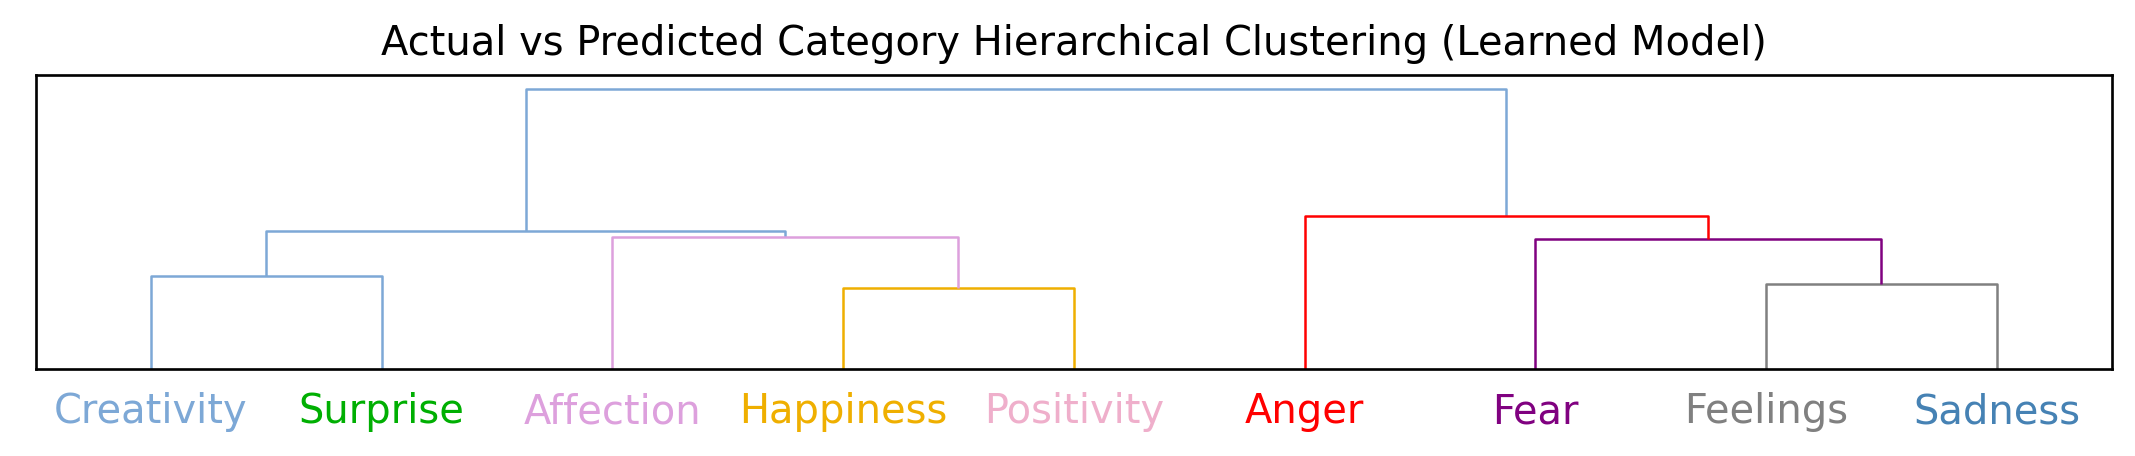

In [14]:
from collections import defaultdict
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, set_link_color_palette
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    
    # Assign the colors of every leaf
    node_colors = defaultdict(lambda: defaultdict(int))
    for node, color in category_index_colors.items():
        node_colors[node][color] += 1
    
    # Compute the color in every node
    for node_index, pair in enumerate(model.children_, n_samples):
        for pair_index in pair:
            colors = node_colors[pair_index]
            for color, count in colors.items():
                node_colors[node_index][color] += count
    
    # Plot the corresponding dendrogram
    def func(index):
        color_map = node_colors[index].items()
        color = sorted(list(color_map), key=lambda x: -x[1])[0][0]
        return color
    dendrogram(linkage_matrix, labels=categories_sorted, link_color_func=func, **kwargs)

dend = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
dend = dend.fit(2 / (pred_cat_confusion_matrix + 1.0) - 1)

plt.figure(figsize=(9, 2), dpi=240)
plt.yticks([])
plt.title('Actual vs Predicted Category Hierarchical Clustering (Learned Model)')

plt.rcParams["lines.linewidth"] = 0.75
plot_dendrogram(dend)
plt.rcParams["lines.linewidth"] = 2

ax = plt.gca()
x_labels = ax.get_xmajorticklabels()

for i, x in enumerate(x_labels):
    color = category_colors[x.get_text()]
    x.set_color(color)

plt.tight_layout()
plt.show()

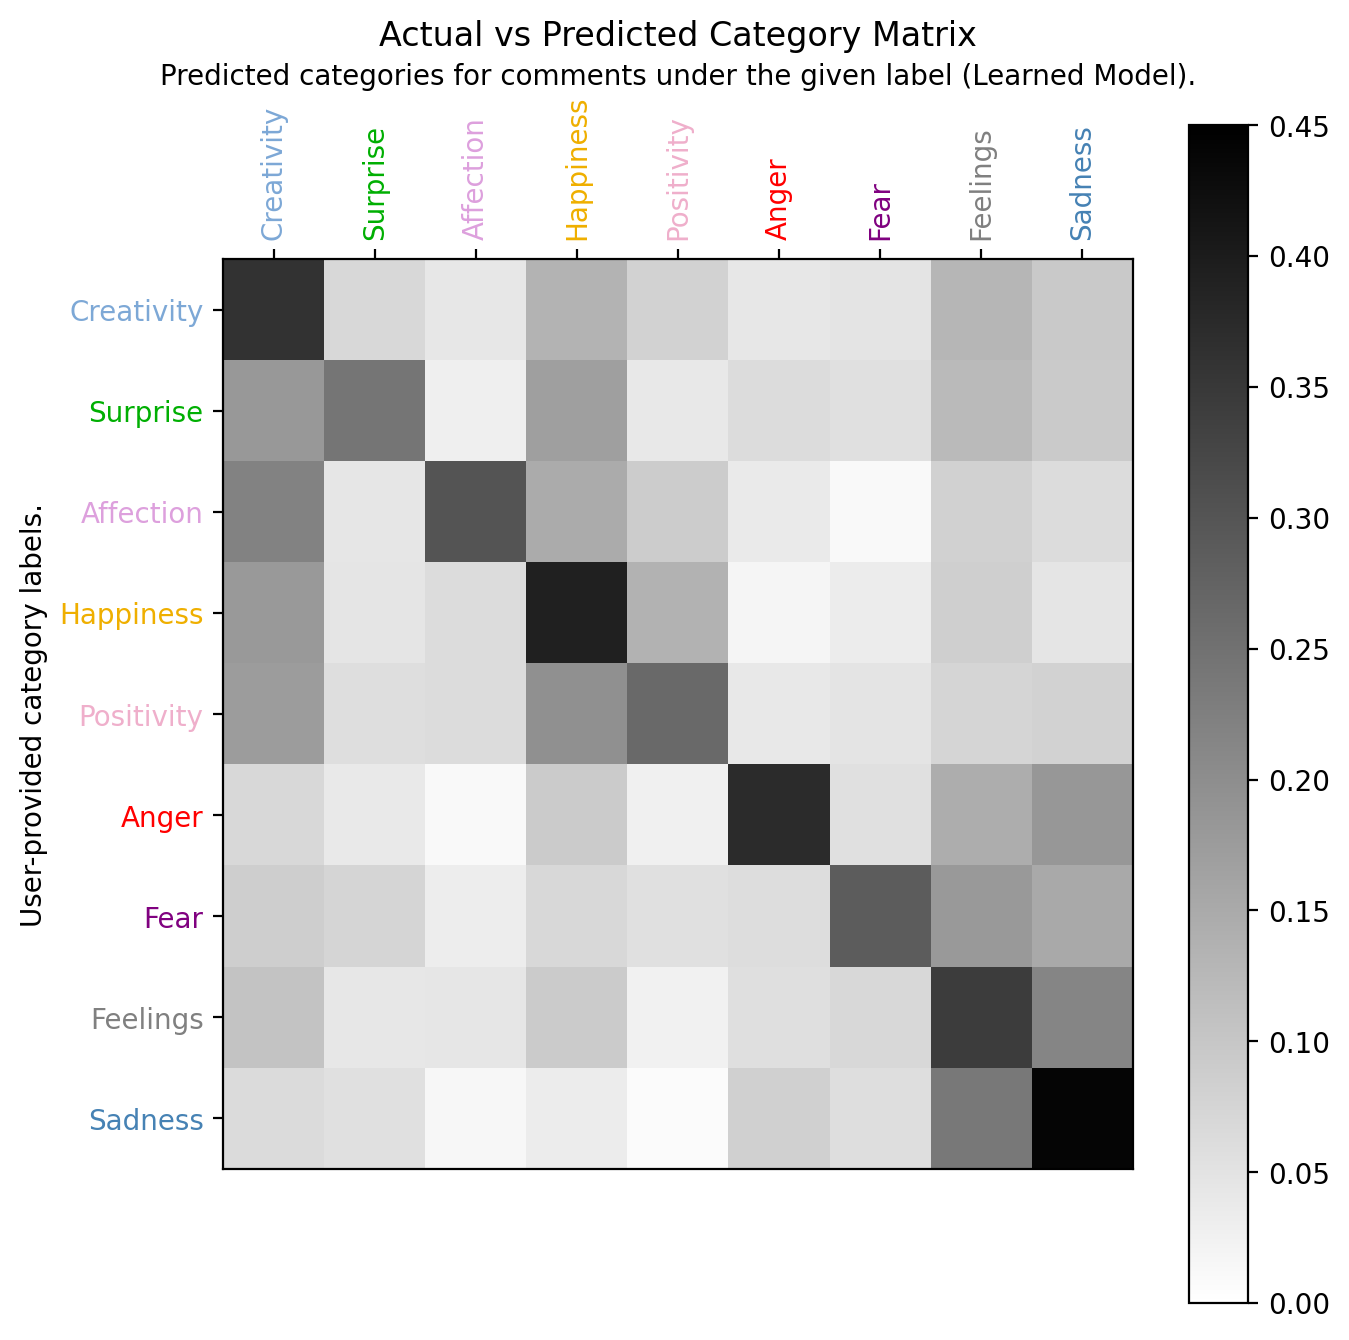

In [15]:
from matplotlib import pyplot as plt

dendrogram_cat_order = [label.get_text() for label in x_labels]
dendrogram_cat_indices = [category_index_mapping[label] for label in dendrogram_cat_order]

cat_confusion_matrix_dend = np.asarray([row[dendrogram_cat_indices] for row in pred_cat_confusion_matrix])
cat_confusion_matrix_dend = cat_confusion_matrix_dend[dendrogram_cat_indices]

fig = plt.figure(figsize=(7, 7), dpi=200)
abs_max = round(cat_confusion_matrix_dend.max() * 20) / 20
plt.matshow(cat_confusion_matrix_dend, fignum=0, cmap='gist_yarg', vmin=0, vmax=abs_max)
plt.colorbar()
plt.title('Actual vs Predicted Category Matrix')
plt.xlabel('Predicted categories for comments under the given label (Learned Model).')
plt.ylabel('User-provided category labels.')
plt.yticks(np.arange(NUM_CATEGORIES), labels=dendrogram_cat_order)
plt.xticks(np.arange(NUM_CATEGORIES), labels=dendrogram_cat_order, rotation='vertical')
fig.axes[0].xaxis.tick_top()
fig.axes[0].xaxis.set_label_position('top')

for tick in list(fig.axes[0].xaxis.get_ticklabels()) + list(fig.axes[0].yaxis.get_ticklabels()):
    label = tick.get_text()
    color = category_colors[label]
    tick.set_color(color)

plt.tight_layout()
plt.savefig('../output/MTurkDatasetLearnedModelCategoryScores.pdf')
plt.show()

In [16]:
import random
from functools import reduce

# We checked that the confusion matrix was not noisy with bootstrapping
# We keep the 'exact' matrix in the end because the results were ~ indistinguishable
SAMPLE_WITH_REPLACEMENT = True
NUM_SIMULATIONS = 10000
LABEL_DROPPING_PROBABILITY = 0.2

outputs = []
count_outputs = []
for _ in range(max(1, NUM_SIMULATIONS)):
    anno_cat_confusion_matrix_partial = np.zeros((NUM_CATEGORIES, NUM_CATEGORIES))
    categories_sorted = sorted(list(category_colors))

    category_index_colors = {i: category_colors[n] for i, n in enumerate(emo_cats)}
    category_index_mapping = {n: i for i, n in enumerate(emo_cats)}

    seen_sets = defaultdict(set)
    num_samples = len(anno_cat_matrix)
    
    normal_indices = [i for i in range(num_samples)]
    actual_indices = normal_indices if not SAMPLE_WITH_REPLACEMENT else random.choices(normal_indices, k=num_samples)
    anno_cat_sim_matrix = anno_cat_matrix[actual_indices]
    anno_cat_sim_matrix *= np.random.random(anno_cat_sim_matrix.shape) > LABEL_DROPPING_PROBABILITY
    for row_index, cat_index in zip(*np.nonzero(anno_cat_sim_matrix)):
        instance_index = actual_indices[row_index]
        actual_cat = emo_cat_matrix[instance_index].argmax()

        if cat_index not in seen_sets[instance_index]:
            anno_cat_confusion_matrix_partial[actual_cat, cat_index] += 1
            seen_sets[instance_index].add(cat_index)

    anno_cat_count_matrix_partial = np.copy(anno_cat_confusion_matrix_partial)
    for i, row in enumerate(anno_cat_confusion_matrix_partial):
        row_count = row.sum()
        if row_count > 0:
            anno_cat_confusion_matrix_partial[i] /= row.sum()
    
    outputs.append(anno_cat_confusion_matrix_partial)
    count_outputs.append(anno_cat_count_matrix_partial)

output_matrix = np.asarray(outputs)
anno_counts_matrix = sum(count_outputs)
anno_cat_confusion_matrix = output_matrix.mean(axis=0)
anno_cat_confusion_matrix 

array([[0.29580166, 0.06506342, 0.11786665, 0.03187187, 0.08185584,
        0.1317953 , 0.14408183, 0.06790324, 0.06376019],
       [0.04878865, 0.294029  , 0.07589218, 0.0852682 , 0.13397106,
        0.03395852, 0.05684295, 0.18164801, 0.08960142],
       [0.08416984, 0.06899825, 0.23304049, 0.07121091, 0.11576318,
        0.10051045, 0.12872399, 0.09364265, 0.10394025],
       [0.06029021, 0.11203884, 0.07601059, 0.22947693, 0.13423046,
        0.05501178, 0.08145438, 0.15435356, 0.09713325],
       [0.0584988 , 0.12044717, 0.08459149, 0.09652583, 0.25053396,
        0.07383521, 0.07151439, 0.15953352, 0.08451963],
       [0.10205114, 0.05282838, 0.13084391, 0.04623729, 0.08067697,
        0.24477951, 0.17875623, 0.06341645, 0.10041013],
       [0.09529434, 0.05579468, 0.1443055 , 0.05456655, 0.08708789,
        0.16043499, 0.25578543, 0.07194095, 0.07478966],
       [0.06273343, 0.12436237, 0.06706181, 0.11992539, 0.17593878,
        0.02862794, 0.04175216, 0.30922374, 0.07037437],


In [17]:
counts_df.sum().sum()

3706.0

In [18]:
class_df = pd.DataFrame(anno_cat_matrix)
class_df.columns = emo_cats
class_df.to_excel('anno_cat_classes.xls', index=False)

counts_df = pd.DataFrame(anno_counts_matrix)
counts_df.columns = emo_cats
counts_df.to_excel('anno_cat_counts.xls', index=False)

In [19]:
P_VALUE = 0.001
percentiles = np.percentile(output_matrix, [P_VALUE / 2, 1.0 - (P_VALUE / 2)], axis=0)
percentiles

array([[[0.24671277, 0.0349945 , 0.08178748, 0.00801209, 0.04341597,
         0.08926923, 0.10343489, 0.03773008, 0.03441458],
        [0.02205847, 0.24426409, 0.04362632, 0.05031605, 0.10101837,
         0.01037649, 0.02992757, 0.1401592 , 0.05813885],
        [0.05382507, 0.03860816, 0.19285668, 0.04236912, 0.08103821,
         0.06493197, 0.09261149, 0.06433948, 0.07321148],
        [0.03585585, 0.07917787, 0.04829082, 0.19414136, 0.09587394,
         0.03149326, 0.04953955, 0.12024564, 0.06611998],
        [0.03293379, 0.08824818, 0.05967105, 0.05953862, 0.21584717,
         0.04795212, 0.04028172, 0.1219547 , 0.04770688],
        [0.06831198, 0.02688567, 0.09126556, 0.01919412, 0.04712721,
         0.20513749, 0.13983549, 0.03360815, 0.06819254],
        [0.06031297, 0.02824204, 0.10864638, 0.02760955, 0.05295337,
         0.12092115, 0.2110079 , 0.0414108 , 0.04377022],
        [0.03759558, 0.09201373, 0.0409645 , 0.08843038, 0.14175907,
         0.00906786, 0.02092711, 0.2733557

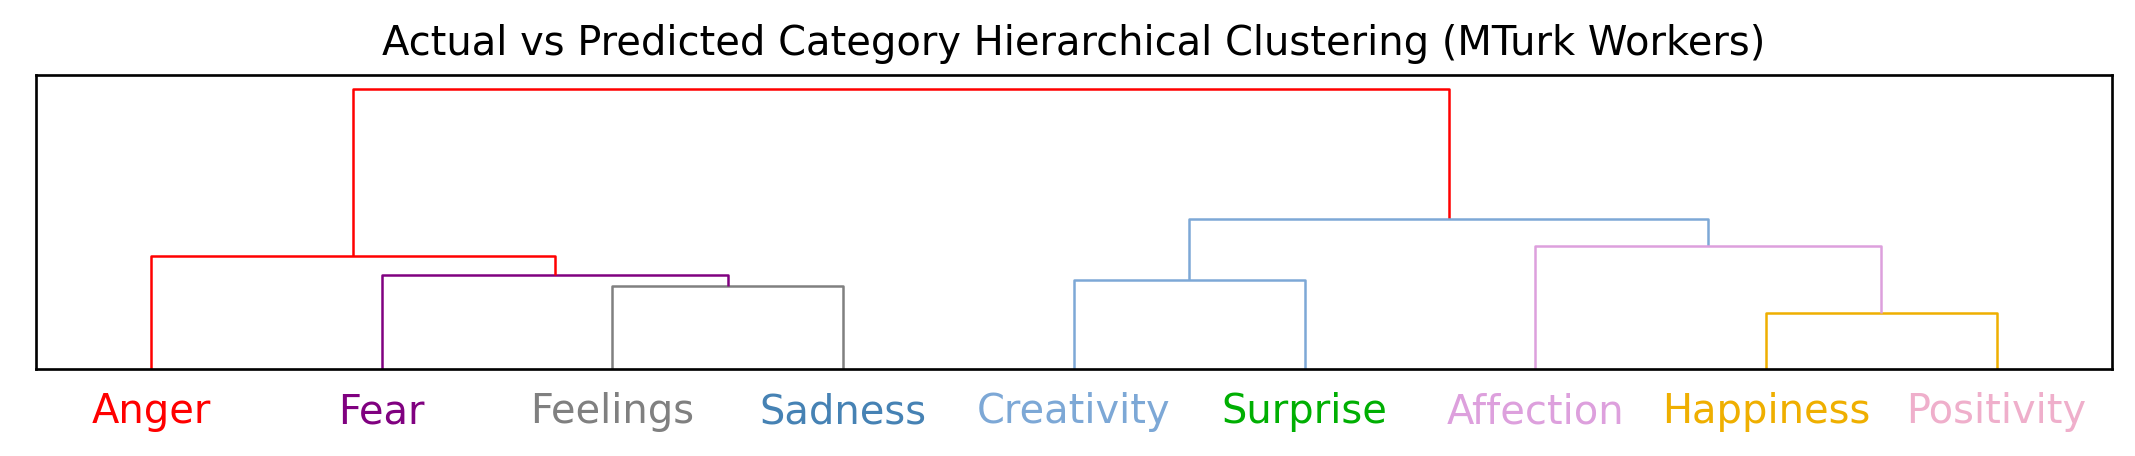

In [20]:
dend_mturk = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
dend_mturk = dend_mturk.fit(2 / (anno_cat_confusion_matrix + 1.0) - 1)

plt.figure(figsize=(9, 2), dpi=240)
plt.yticks([])
plt.title('Actual vs Predicted Category Hierarchical Clustering (MTurk Workers)')

plt.rcParams["lines.linewidth"] = 0.75
plot_dendrogram(dend_mturk)
plt.rcParams["lines.linewidth"] = 2

ax = plt.gca()
x_mturk_labels = ax.get_xmajorticklabels()

for i, x in enumerate(x_mturk_labels):
    color = category_colors[x.get_text()]
    x.set_color(color)

plt.tight_layout()
plt.show()

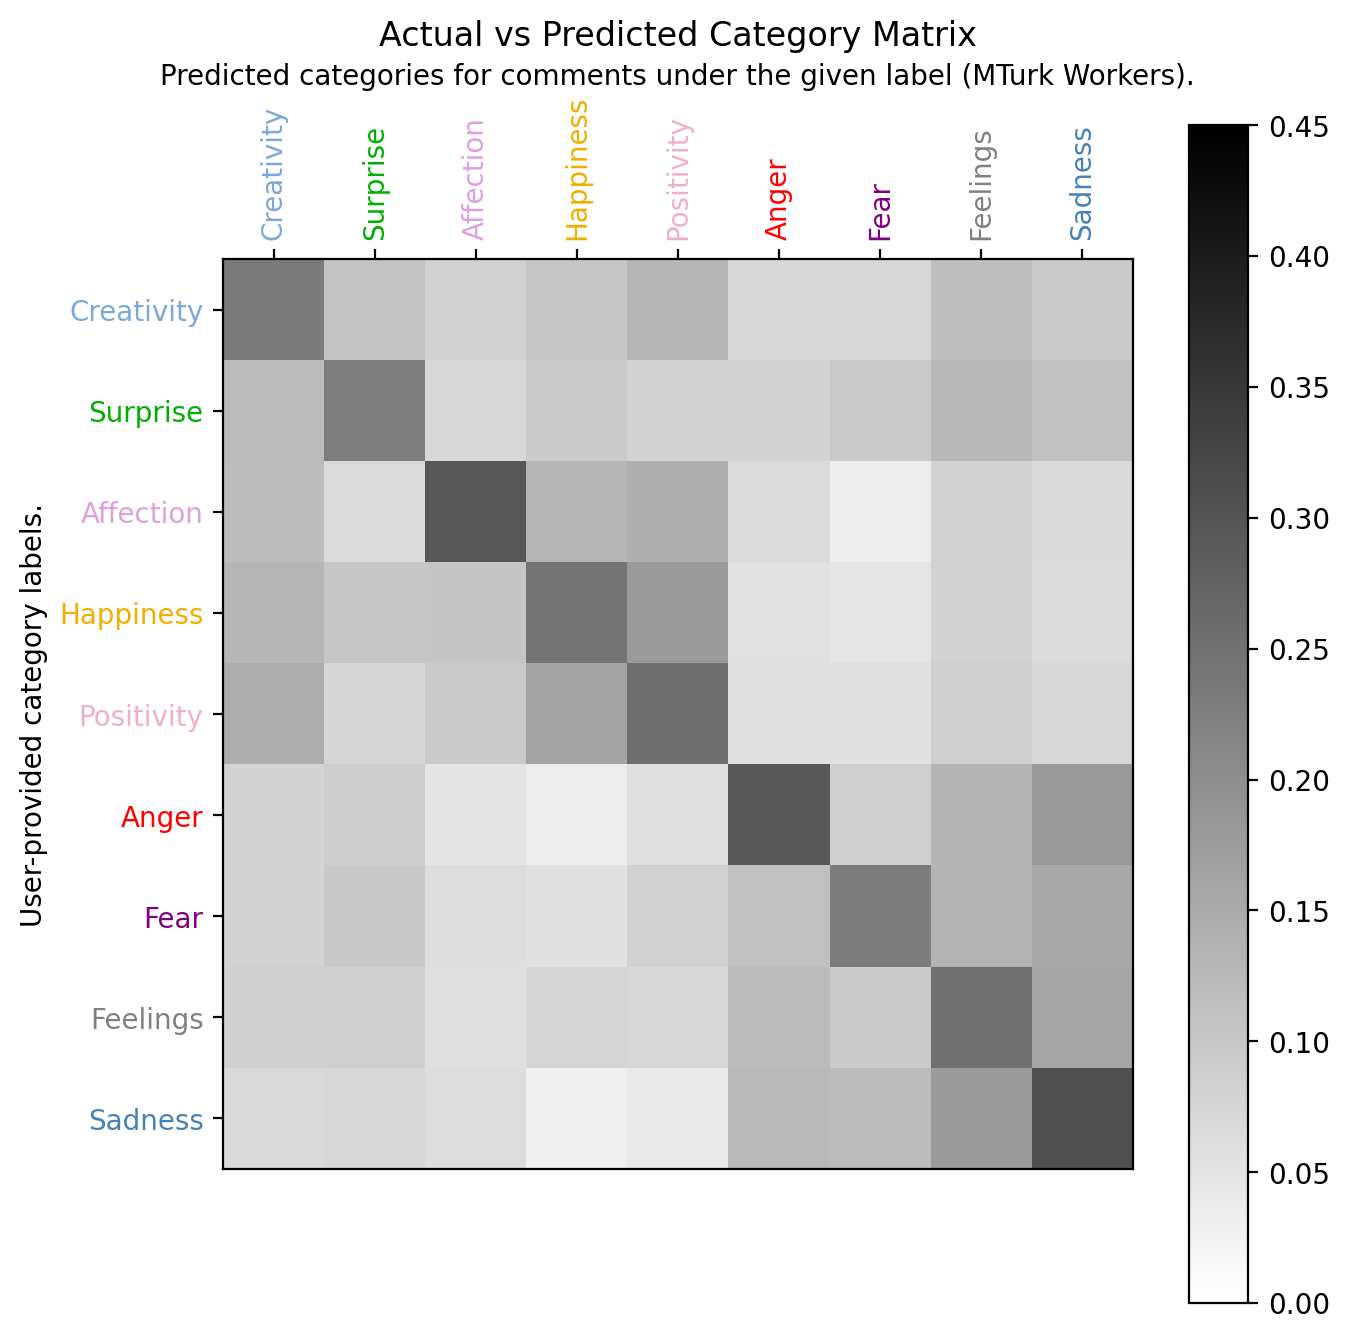

In [21]:
from matplotlib import pyplot as plt

dendrogram_cat_order = [label.get_text() for label in x_labels]
dendrogram_cat_indices = [category_index_mapping[label] for label in dendrogram_cat_order]

cat_confusion_matrix_dend = np.asarray([row[dendrogram_cat_indices] for row in anno_cat_confusion_matrix])
cat_confusion_matrix_dend = cat_confusion_matrix_dend[dendrogram_cat_indices]

fig = plt.figure(figsize=(7, 7), dpi=200)
plt.matshow(cat_confusion_matrix_dend, fignum=0, cmap='gist_yarg', vmin=0, vmax=abs_max)
plt.colorbar()
plt.title('Actual vs Predicted Category Matrix')
plt.xlabel('Predicted categories for comments under the given label (MTurk Workers).')
plt.ylabel('User-provided category labels.')
plt.yticks(np.arange(NUM_CATEGORIES), labels=dendrogram_cat_order)
plt.xticks(np.arange(NUM_CATEGORIES), labels=dendrogram_cat_order, rotation='vertical')
fig.axes[0].xaxis.tick_top()
fig.axes[0].xaxis.set_label_position('top')

for tick in list(fig.axes[0].xaxis.get_ticklabels()) + list(fig.axes[0].yaxis.get_ticklabels()):
    label = tick.get_text()
    color = category_colors[label]
    tick.set_color(color)

plt.tight_layout()
plt.savefig('../output/MTurkDatasetWorkersCategoryScores.pdf')
plt.show()

In [22]:
len(anno_cat_matrix)

2640

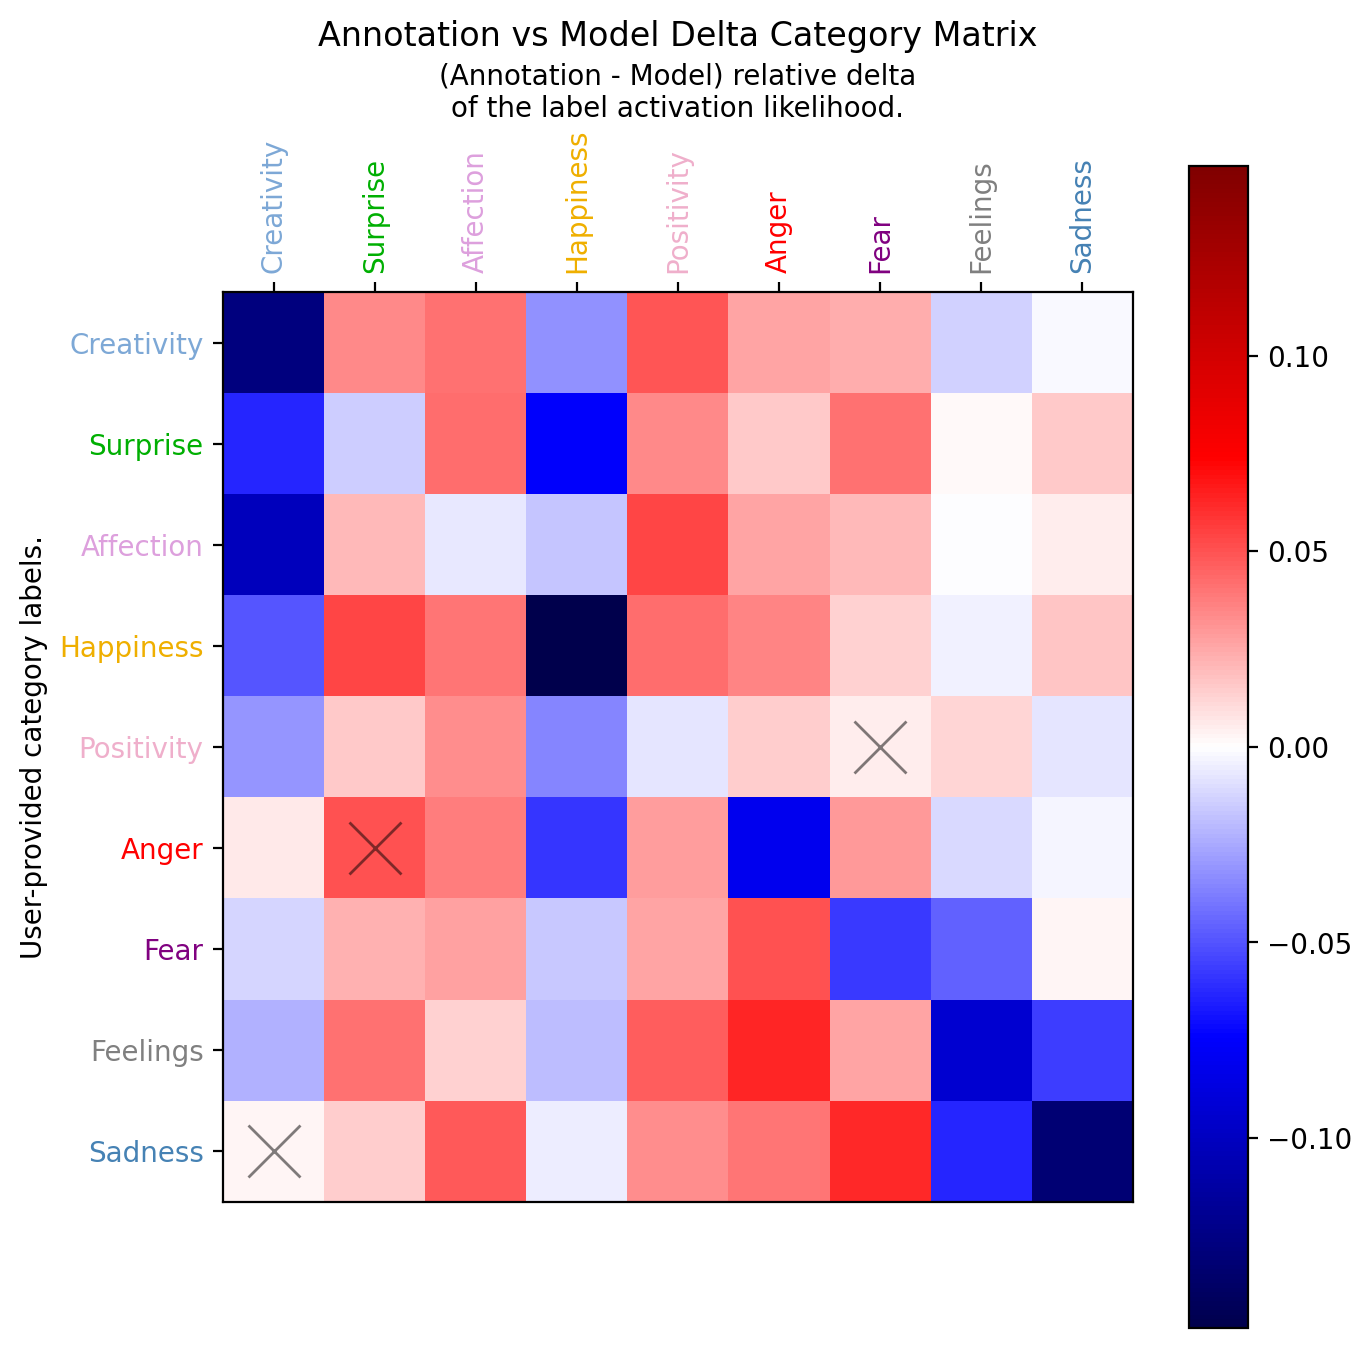

In [23]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches

dendrogram_cat_order = [label.get_text() for label in x_labels]
dendrogram_cat_indices = [category_index_mapping[label] for label in dendrogram_cat_order]

delta_matrix = anno_cat_confusion_matrix - pred_cat_confusion_matrix
delta_matrix_in_range = delta_matrix - percentiles
bottom, top = delta_matrix_in_range < 0
significant = np.logical_not(np.logical_xor(bottom, top))
delta_matrix_with_significants_zero = delta_matrix

cat_confusion_matrix_dend = np.asarray([row[dendrogram_cat_indices] 
                                        for row in delta_matrix_with_significants_zero])
cat_confusion_matrix_dend = cat_confusion_matrix_dend[dendrogram_cat_indices]
absmax = np.abs(cat_confusion_matrix_dend).max()

fig = plt.figure(figsize=(7, 7), dpi=200)
plt.matshow(cat_confusion_matrix_dend, fignum=0, cmap='seismic', vmin=-absmax, vmax=absmax)
plt.colorbar()

mask_size = len(significant)
x, y = np.meshgrid(np.arange(mask_size), np.arange(mask_size))
plt.plot(np.ma.array(x, mask=significant), y, 'kx', alpha=0.5, markersize=19)

plt.title('Annotation vs Model Delta Category Matrix')
plt.xlabel('(Annotation - Model) relative delta\nof the label activation likelihood.')
plt.ylabel('User-provided category labels.')
plt.yticks(np.arange(NUM_CATEGORIES), labels=dendrogram_cat_order)
plt.xticks(np.arange(NUM_CATEGORIES), labels=dendrogram_cat_order, rotation='vertical')
fig.axes[0].xaxis.tick_top()
fig.axes[0].xaxis.set_label_position('top')

for tick in list(fig.axes[0].xaxis.get_ticklabels()) + list(fig.axes[0].yaxis.get_ticklabels()):
    label = tick.get_text()
    color = category_colors[label]
    tick.set_color(color)

plt.tight_layout()
plt.savefig('../output/MTurkDatasetCategoryScoresDeltas.pdf')
plt.show()